<a href="https://colab.research.google.com/github/Thanvitha/gis/blob/main/ps1_Thanvitha_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS1_Thanvitha Reddy**

In [36]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import seaborn as sns

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [37]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [5]:
! wget -q -O indian_map.zip https://docs.google.com/uc?id=1Bd7AxTbQYiQIPZy4u92ML489KG2OgsZo&export=download

zip_ref = zipfile.ZipFile('indian_map.zip', 'r'); zip_ref.extractall('Indian States'); zip_ref.close() #just unzipping
ind_gdf=gpd.read_file('/content/Indian States/India States/Indian_states.shp')

<Axes: >

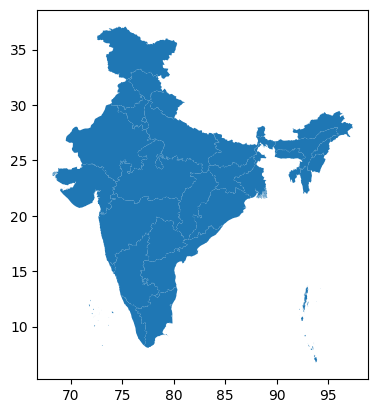

In [6]:
ind_gdf.plot()

In [7]:
ind_gdf['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()
type(ind_gdf)

geopandas.geodataframe.GeoDataFrame

In [8]:
ind_gdf.columns

Index(['st_nm', 'geometry'], dtype='object')

In [9]:
ind_gdf.dtypes

st_nm         object
geometry    geometry
dtype: object

In [ ]:
ind_gdf

In [ ]:
path = '/content/drive/MyDrive/india_population_2011.csv'
ind_pop=pd.read_csv(path)

path = '/content/drive/MyDrive/india_humantrafficking_2011.csv'
ind_humantraffic=pd.read_csv(path)
ind_humantraffic.drop(['Sl. No.'], axis=1)

path = '/content/drive/MyDrive/india-distribution-of-suicides-2021-state-ut-city-rate-split.csv'
ind_suicides=pd.read_csv(path)
ind_suicides.drop(['Sl.'], axis=1)

In [131]:
ind_pop.columns

Index(['st_nm', 'Population', 'Males', 'Females',
       'Number of villages_Inhabited', 'Number of villages_Uninhabited',
       'Number of towns', 'Number of households', 'Area in sq. km.',
       'Population per sq. km.'],
      dtype='object')

In [132]:
ind_humantraffic.columns

Index(['Sl. No.', 'States/UTs', 'Forced Labour',
       'Sexual Exploitation for Prostitution',
       'Other forms of sexual exploitation', 'Domestic Servitude',
       'Forced marriage', 'Petty Crimes', 'Child Pornography ', 'Begging',
       'Drug Peddling', 'Removal of Organs', 'Other reasons', 'Total Persons'],
      dtype='object')

In [133]:
ind_suicides.columns

Index(['Sl.', 'State/UT', 'Unnamed: 2', 'Number of Suicides',
       'Percentage share in total suicides',
       'Projected mid-year population (in lakhs)', 'Rate of Suicides',
       '2020 Total', 'Percentage variation', 'Male', 'Female', 'Transgender'],
      dtype='object')

In [134]:
ind_pop.dtypes

st_nm                             object
Population                         int64
Males                              int64
Females                            int64
Number of villages_Inhabited       int64
Number of villages_Uninhabited     int64
Number of towns                    int64
Number of households               int64
Area in sq. km.                    int64
Population per sq. km.             int64
dtype: object

In [135]:
ind_humantraffic.dtypes

Sl. No.                                 object
States/UTs                              object
Forced Labour                            int64
Sexual Exploitation for Prostitution     int64
Other forms of sexual exploitation       int64
Domestic Servitude                       int64
Forced marriage                          int64
Petty Crimes                             int64
Child Pornography                        int64
Begging                                  int64
Drug Peddling                            int64
Removal of Organs                        int64
Other reasons                            int64
Total Persons                            int64
dtype: object

In [136]:
ind_suicides.dtypes

Sl.                                         float64
State/UT                                     object
Unnamed: 2                                  float64
Number of Suicides                          float64
Percentage share in total suicides          float64
Projected mid-year population (in lakhs)    float64
Rate of Suicides                            float64
2020 Total                                  float64
Percentage variation                        float64
Male                                        float64
Female                                      float64
Transgender                                 float64
dtype: object

In [137]:
ind_pop['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [167]:
ind_humantraffic=ind_humantraffic.drop(['Sl. No.'], axis=1)

In [169]:
ind_suicides=ind_suicides.drop(['Sl.'], axis=1)

In [148]:
ind_humantraffic.rename(columns={"States/UTs": "st_nm"}, inplace=True)

In [149]:
ind_suicides.rename(columns={"State/UT": "st_nm"}, inplace=True)

In [150]:
ind_humantraffic['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [151]:
ind_suicides['st_nm'] = ind_gdf['st_nm'].str.replace('&','').str.replace(" ",'').str.upper()

In [168]:
ind_humantraffic.head()

,st_nm,Forced Labour,Sexual Exploitation for Prostitution,Other forms of sexual exploitation,Domestic Servitude,Forced marriage,Petty Crimes,Child Pornography,Begging,Drug Peddling,Removal of Organs,Other reasons,Total Persons
0,ANDAMANNICOBARISLAND,0,223,0,3,0,0,0,0,0,0,53,279
1,ARUNANCHALPRADESH,0,0,0,1,0,0,0,0,0,0,2,3
2,ASSAM,127,29,0,96,54,6,1,0,0,3,109,425
3,BIHAR,197,112,0,24,4,0,0,0,0,1,46,384
4,CHANDIGARH,69,3,0,3,7,0,0,0,0,0,10,92


In [170]:
ind_suicides.head()

,st_nm,Unnamed: 2,Number of Suicides,Percentage share in total suicides,Projected mid-year population (in lakhs),Rate of Suicides,2020 Total,Percentage variation,Male,Female,Transgender
0,ANDAMANNICOBARISLAND,NaN,8067.0,4.9,528.49,15.3,7043.0,14.5,6046.0,2021.0,0.0
1,ARUNANCHALPRADESH,NaN,160.0,0.1,15.37,10.4,160.0,0.0,111.0,49.0,0.0
2,ASSAM,NaN,3262.0,2.0,351.55,9.3,3243.0,0.6,2351.0,911.0,0.0
3,BIHAR,NaN,827.0,0.5,1236.95,0.7,809.0,2.2,470.0,357.0,0.0
4,CHANDIGARH,NaN,7828.0,4.8,296.07,26.4,7710.0,1.5,5625.0,2203.0,0.0


In [154]:
ind_pop.head()

,st_nm,Population,Males,Females,Number of villages_Inhabited,Number of villages_Uninhabited,Number of towns,Number of households,Area in sq. km.,Population per sq. km.
0,INDIA,1028737436,532223090,496514346,593732,44856,5161,193579954,3287263,325
1,JAMMU & KASHMIR,10143700,5360926,4782774,6417,235,75,1568519,222236,100
2,HIMACHAL PRADESH,6077900,3087940,2989960,17495,2623,57,1221589,55673,109
3,PUNJAB,24358999,12985045,11373954,12278,395,157,4348580,50362,484
4,CHANDIGARH,900635,506938,393697,23,1,1,206465,114,7900


In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
ind_pop.plot(ax=ax,column='st_nm',legend=True,cmap='YlOrRd',linewidth=2)
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

# **Merge of India shapefile with Population**

In [171]:
ind_map1 = pd.merge(ind_gdf, ind_pop, on='st_nm',how='outer',indicator=True)
ind_map1[['st_nm','_merge']]

ind_map2 = pd.merge(ind_gdf, ind_pop, on='st_nm',how='inner',indicator=False)

,st_nm,_merge
0,ANDAMANNICOBARISLAND,left_only
1,ARUNANCHALPRADESH,left_only
2,ASSAM,both
3,BIHAR,both
4,CHANDIGARH,both
5,CHHATTISGARH,both
6,DADARANAGARHAVELLI,left_only
7,DAMANDIU,left_only
8,GOA,both
9,GUJARAT,both


# **Indian Population plots**

<Axes: >

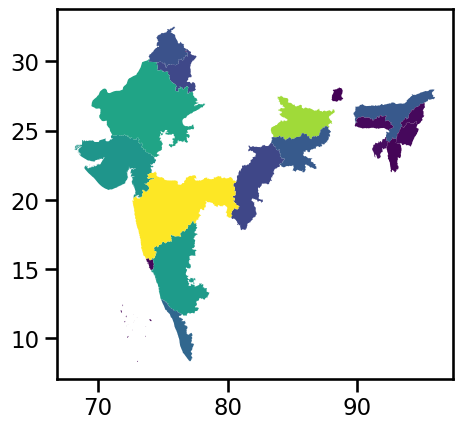

In [172]:
ind_map2.plot(column='Population')

<Axes: >

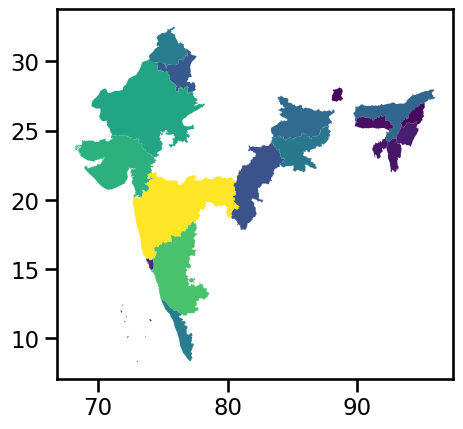

In [173]:
ind_map2.plot(column='Number of towns')

<Axes: >

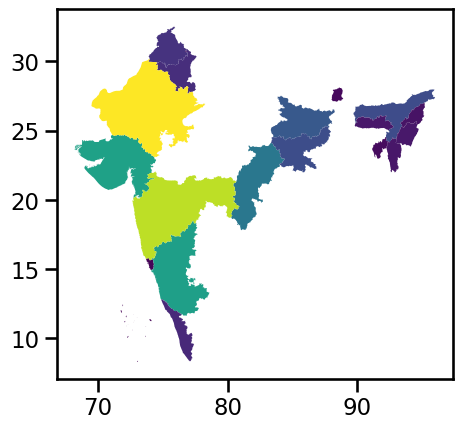

In [174]:
ind_map2.plot(column='Area in sq. km.')

<Axes: >

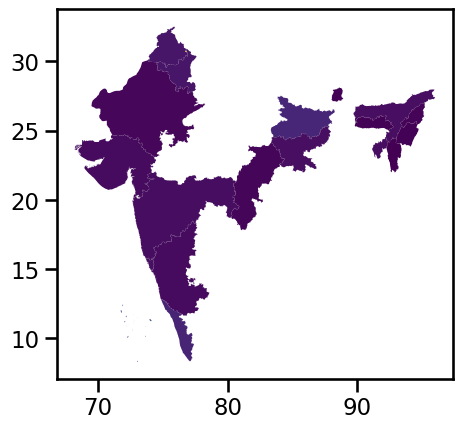

In [175]:
ind_map2.plot(column='Population per sq. km.')

# **Merge of India shapefile with human trafficking**

In [160]:
ind_map3 = pd.merge(ind_gdf, ind_humantraffic, on='st_nm',how='outer',indicator=True)
ind_map3[['st_nm','_merge']]

ind_map4 = pd.merge(ind_gdf, ind_humantraffic, on='st_nm',how='inner',indicator=False)

,st_nm,_merge
0,ANDAMANNICOBARISLAND,both
1,ARUNANCHALPRADESH,both
2,ASSAM,both
3,BIHAR,both
4,CHANDIGARH,both
5,CHHATTISGARH,both
6,DADARANAGARHAVELLI,both
7,DAMANDIU,both
8,GOA,both
9,GUJARAT,both


# **Human Trafficking plots**

<Axes: >

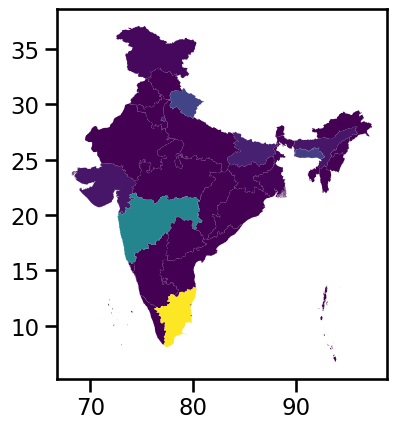

In [161]:
ind_map4.plot(column='Forced Labour')

<Axes: >

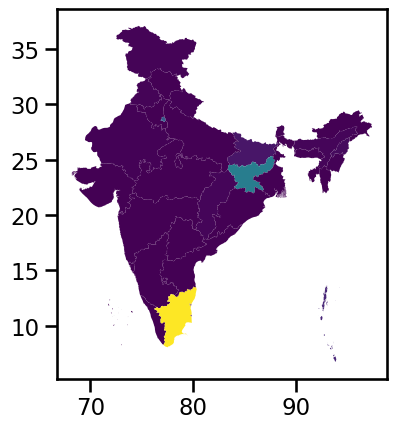

In [162]:
ind_map4.plot(column='Sexual Exploitation for Prostitution')

<Axes: >

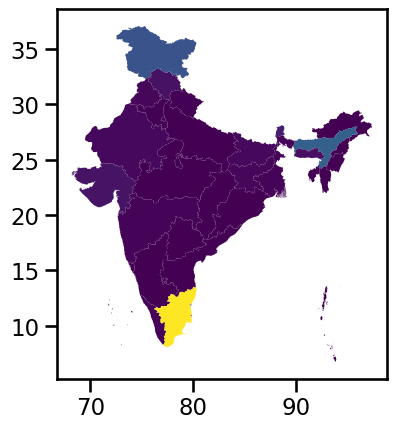

In [89]:
ind_map4.plot(column='Forced marriage')

<Axes: >

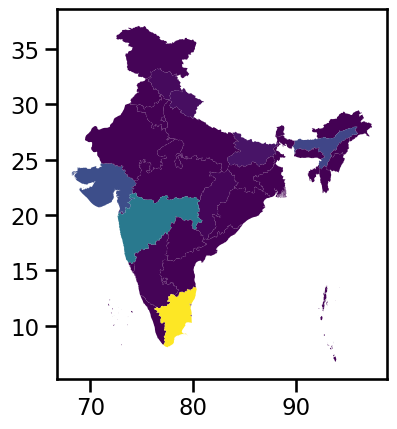

In [90]:
ind_map4.plot(column='Domestic Servitude')

<Axes: >

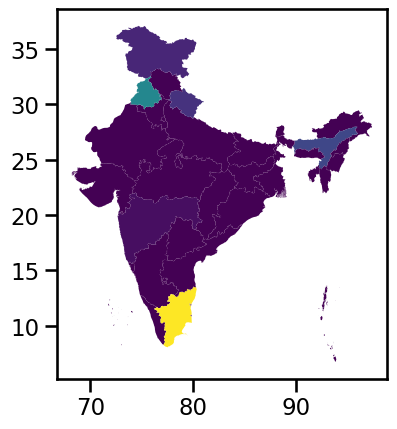

In [91]:
ind_map4.plot(column='Petty Crimes')

<Axes: >

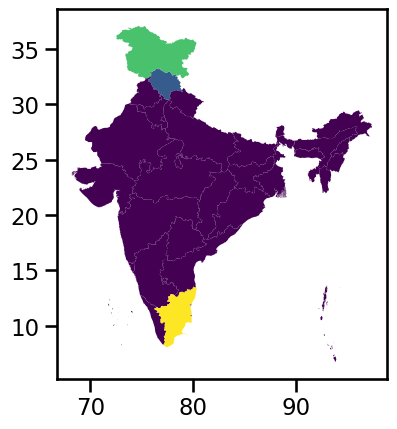

In [93]:
ind_map4.plot(column='Begging')

<Axes: >

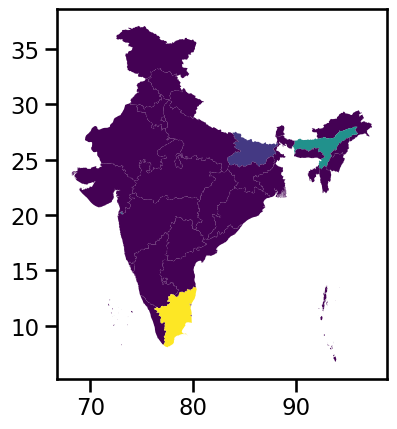

In [95]:
ind_map4.plot(column='Removal of Organs')

<Axes: >

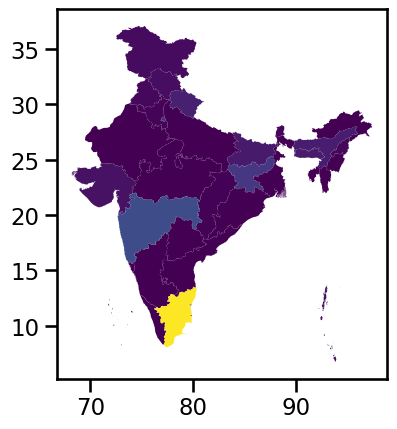

In [96]:
ind_map4.plot(column='Total Persons')

# **Merge of India shapefile with suicides statewise**

In [176]:
ind_map5 = pd.merge(ind_gdf, ind_suicides, on='st_nm',how='outer',indicator=True)
ind_map5[['st_nm','_merge']]

ind_map6 = pd.merge(ind_gdf, ind_suicides, on='st_nm',how='inner',indicator=False)

,st_nm,_merge
0,ANDAMANNICOBARISLAND,both
1,ARUNANCHALPRADESH,both
2,ASSAM,both
3,BIHAR,both
4,CHANDIGARH,both
...,...,...
93,NaN,right_only
94,NaN,right_only
95,NaN,right_only
96,NaN,right_only


# **Suicide plots**

<Axes: >

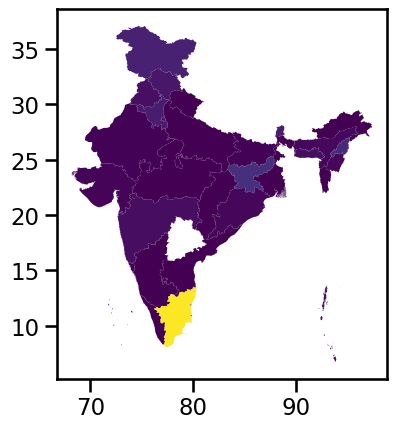

In [177]:
ind_map6.plot(column='Number of Suicides')

<Axes: >

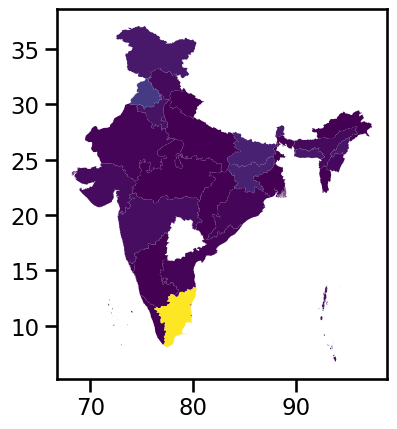

In [179]:
ind_map6.plot(column='Projected mid-year population (in lakhs)')

<Axes: >

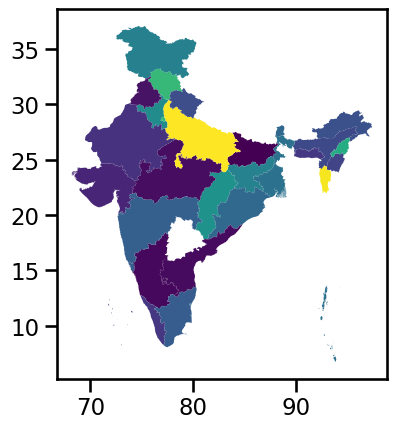

In [180]:
ind_map6.plot(column='Rate of Suicides')

<Axes: >

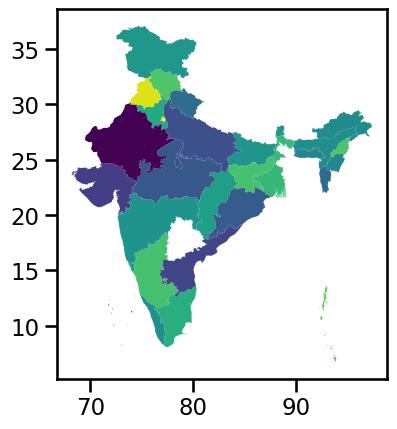

In [182]:
ind_map6.plot(column='Percentage variation')

#**Statistics of Foreign tourist arrivals to India**


In [48]:
no_of_tourists=pd.read_excel('/content/drive/MyDrive/statistic_id206872_number-of-foreign-tourist-arrivals-in-india-2000-2021.xlsx')

In [49]:
no_of_tourists.head(10)

,Year,Number of foreign tourist arrivals in India 2000-2021
0,2000,2.65
1,2001,2.54
2,2002,2.38
3,2003,2.73
4,2004,3.46
5,2005,3.92
6,2006,4.45
7,2007,5.08
8,2008,5.28
9,2009,5.17


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'International Tourists To India [2000-2021]')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of tourists (in millions)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021')])

[Text(0, 0, '2.65'),
 Text(0, 0, '2.54'),
 Text(0, 0, '2.38'),
 Text(0, 0, '2.73'),
 Text(0, 0, '3.46'),
 Text(0, 0, '3.92'),
 Text(0, 0, '4.45'),
 Text(0, 0, '5.08'),
 Text(0, 0, '5.28'),
 Text(0, 0, '5.17'),
 Text(0, 0, '5.78'),
 Text(0, 0, '6.31'),
 Text(0, 0, '6.58'),
 Text(0, 0, '6.97'),
 Text(0, 0, '7.68'),
 Text(0, 0, '8.03'),
 Text(0, 0, '8.8'),
 Text(0, 0, '10.04'),
 Text(0, 0, '10.56'),
 Text(0, 0, '10.93'),
 Text(0, 0, '2.74'),
 Text(0, 0, '1.52')]

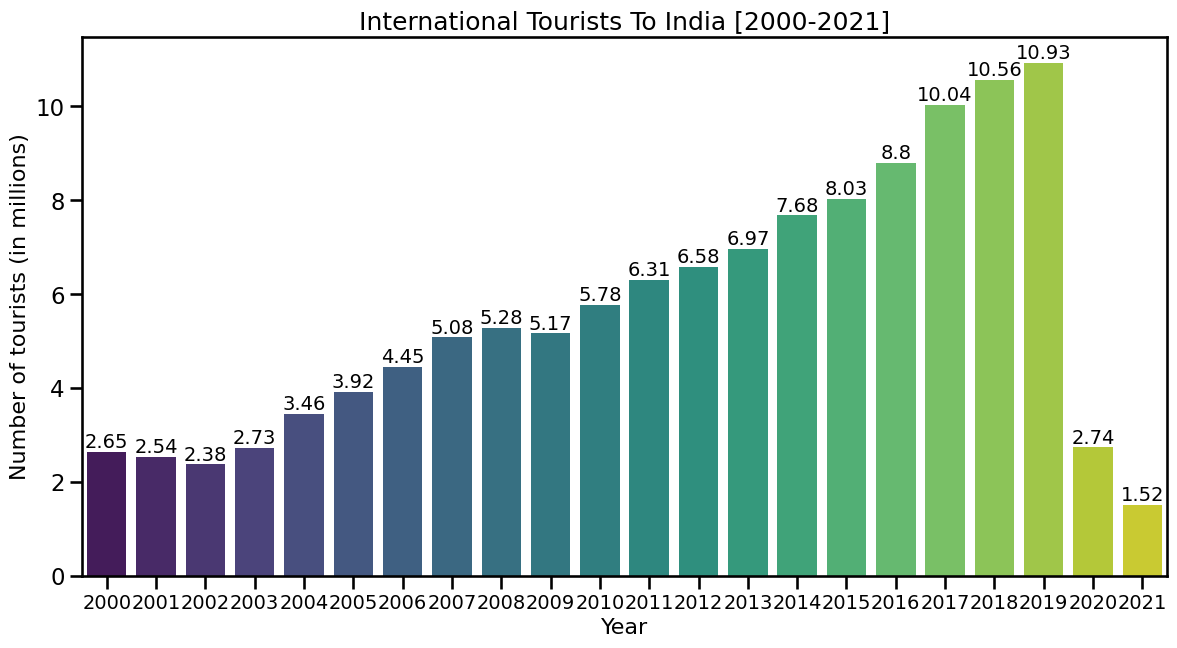

In [55]:
plt.figure(figsize=(14,7))

g=sns.barplot(x='Year', y='Number of foreign tourist arrivals in India 2000-2021',data=no_of_tourists, palette='viridis', label="Some Label")

plt.title("International Tourists To India [2000-2021]", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of tourists (in millions)", fontsize=16)
plt.xticks(fontsize=14)

g.bar_label(g.containers[0], fontsize=14) #labelling the bars with values

plt.show()

#**Average % distribution of Tourists Quaterly from [2001 - 2019]**

In [57]:
path = '/content/drive/MyDrive/India-Tourism-Statistics-2001-2019-quaterly.csv'
quarterly=pd.read_csv(path).copy().rename(columns={
    '% Distribution by Quarter - 1st Quarter (Jan-Mar)':'1st Quarter',
    '% Distribution by Quarter - 2nd Quarter(Apr-June)':'2nd Quarter',
    '% Distribution by Quarter - 3rd Quarter (July-Sep)':'3rd Quarter',
    '% Distribution by Quarter - 4th Quarter (Oct-Dec)':'4th Quarter',
})
quarterly.head()

,Year,Arrivals,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
0,2001,2537282,31.3,20.2,23.0,25.5
1,2002,2384364,28.8,18.4,21.1,31.7
2,2003,2726214,27.7,17.6,22.8,31.9
3,2004,3457477,27.8,18.3,21.8,32.1
4,2005,3918610,28.3,18.4,21.4,31.9


In [58]:
quarter1=quarterly[['Year','1st Quarter']].copy()
quarter2=quarterly[['Year','2nd Quarter']].copy()
quarter3=quarterly[['Year','3rd Quarter']].copy()
quarter4=quarterly[['Year','4th Quarter']].copy()
# quarter1.head()
# quarter2.head()
# quarter3.head()
# quarter4.head()

# converting %ages to actual values
quarter1['1st Quarter']=quarter1['1st Quarter']*quarterly['Arrivals']/100
quarter2['2nd Quarter']=quarter2['2nd Quarter']*quarterly['Arrivals']/100
quarter3['3rd Quarter']=quarter3['3rd Quarter']*quarterly['Arrivals']/100
quarter4['4th Quarter']=quarter4['4th Quarter']*quarterly['Arrivals']/100

In [59]:
sum_arrivals=quarterly['Arrivals'].sum()

average_percentage_quarter=[
    quarter1['1st Quarter'].sum()/sum_arrivals * 100,
    quarter2['2nd Quarter'].sum()/sum_arrivals * 100,
    quarter3['3rd Quarter'].sum()/sum_arrivals * 100,
    quarter4['4th Quarter'].sum()/sum_arrivals * 100,
]

average_percentage_quarter

[28.807179062028148, 19.187795324983707, 21.64875763359771, 30.349040603325218]

In [61]:
quarterly2019=quarterly[quarterly['Year']==2019].copy()
quarterly2019=quarterly2019.drop(['Arrivals','Year'],axis=1)

In [63]:
quarterly2019.head()

,1st Quarter,2nd Quarter,3rd Quarter,4th Quarter
18,29.1,19.4,21.7,29.9


<Figure size 1000x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d4e81dccd60>,
 [Text(-0.8706706630647499, 0.6722593223439812, '1st Quarter\n(Jan-Mar)'),
  Text(-0.7138020560921241, -0.8369507899026419, '2nd Quarter\n(Apr-Jun)'),
  Text(0.6062747296927833, -0.9178403739953602, '3rd Quarter\n(Jul-Sep)'),
  Text(0.8872733557376457, 0.6501891972326652, '4th Quarter\n(Oct-Dec)')],
 [Text(-0.47491127076259076, 0.36668690309671703, '29.1%'),
  Text(-0.38934657605024947, -0.45651861267416827, '19.4%'),
  Text(0.3306953071051545, -0.5006402039974692, '21.7%'),
  Text(0.4839672849478066, 0.3546486530359992, '29.9%')])

Text(0.5, 1.0, 'Average % Distribution of Tourists Quarterly in 2019')

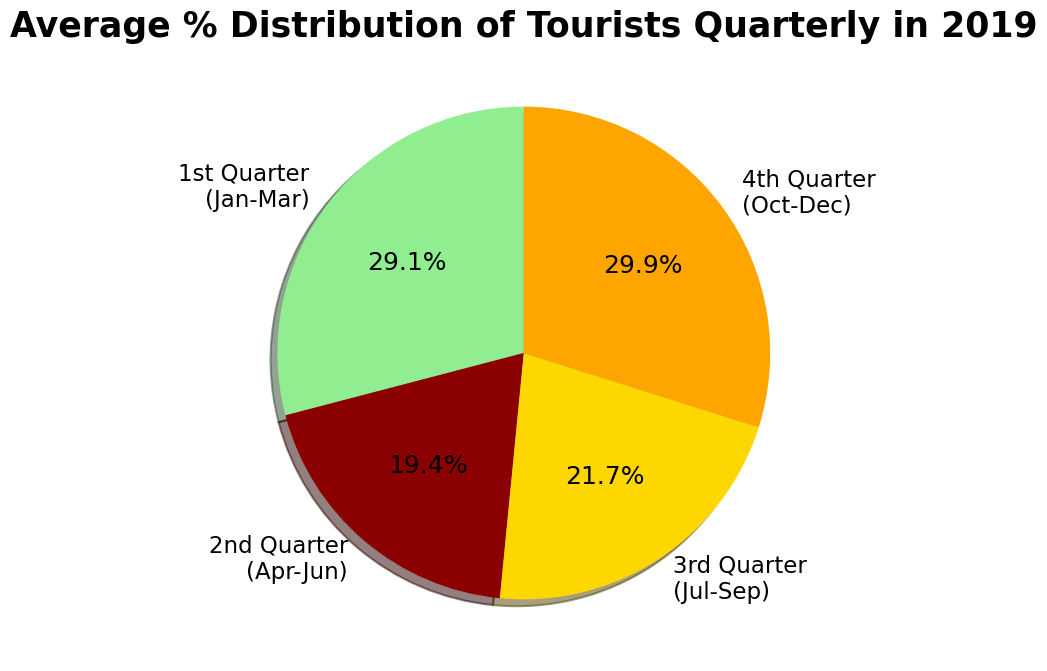

In [66]:
colors = ['yellowgreen', 'lightgreen', 'darkred', 'gold','orange', 'red', 'lightsalmon']
quarter_labels=['1st Quarter\n(Jan-Mar)','2nd Quarter\n(Apr-Jun)','3rd Quarter\n(Jul-Sep)','4th Quarter\n(Oct-Dec)']

plt.figure(figsize=(10,8))
plt.pie(quarterly2019.loc[18,:].values.tolist(), labels=quarter_labels, colors=colors[1:],
            autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Average % Distribution of Tourists Quarterly in 2019",fontsize=25,fontweight='bold')

# displaying chart
plt.show()

#**Average % age distribution of Tourists based on age [2001 - 2019]**

In [71]:
path = ('/content/drive/MyDrive/India-Tourism-Statistics-2001-2019-agegroup.csv')
agegroup=pd.read_csv(path)

In [72]:
agegroup.head()

,Year,FTAs,% distribution by Age-Group (in Year) - 0-14,% distribution by Age-Group (in Year) - 15-24,% distribution by Age-Group (in Year) - 25-34,% distribution by Age-Group (in Year) - 35-44,% distribution by Age-Group (in Year) - 45-54,% distribution by Age-Group (in Year) - 55-64,% distribution by Age-Group (in Year) - 65 and above,% distribution by Age-Group (in Year) - Not Reported
0,2001,2537282,7.0,10.8,20.1,21.1,19.4,11.9,6.7,3.0
1,2002,2384364,9.2,10.0,19.4,21.6,19.4,11.5,7.7,1.2
2,2003,2726214,7.2,10.0,19.5,21.6,19.4,11.5,7.7,3.1
3,2004,3457477,8.5,9.8,18.8,21.3,19.4,12.8,8.2,0.2
4,2005,3918610,8.6,9.6,18.8,21.3,19.5,13.0,8.7,0.5


In [73]:
# Renaming the columns
agegroup_elaborate=agegroup.copy().rename(columns={
    '% distribution by Age-Group (in Year) - 0-14':'0-14',
    '% distribution by Age-Group (in Year) - 15-24':'15-24',
    '% distribution by Age-Group (in Year) - 25-34':'25-34',
    '% distribution by Age-Group (in Year) - 35-44':'35-44',
    '% distribution by Age-Group (in Year) - 45-54':'45-54',
    '% distribution by Age-Group (in Year) - 55-64':'55-64',
    '% distribution by Age-Group (in Year) - 65 and above':'65 and above',
    '% distribution by Age-Group (in Year) - Not Reported':'Not Reported',
})

# converting %ages to actual values and shifting the decimal places by 3 to the left
agegroup_elaborate['0-14']=agegroup_elaborate['0-14']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['15-24']=agegroup_elaborate['15-24']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['25-34']=agegroup_elaborate['25-34']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['35-44']=agegroup_elaborate['35-44']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['45-54']=agegroup_elaborate['45-54']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['55-64']=agegroup_elaborate['55-64']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['65 and above']=agegroup_elaborate['65 and above']*agegroup_elaborate['FTAs']/100 * 10**-3
agegroup_elaborate['Not Reported']=agegroup_elaborate['Not Reported']*agegroup_elaborate['FTAs']/100 * 10**-3

agegroup_elaborate.head()

,Year,FTAs,0-14,15-24,25-34,35-44,45-54,55-64,65 and above,Not Reported
0,2001,2537282,177.609740,274.026456,509.993682,535.366502,492.232708,301.936558,169.997894,76.118460
1,2002,2384364,219.361488,238.436400,462.566616,515.022624,462.566616,274.201860,183.596028,28.612368
2,2003,2726214,196.287408,272.621400,531.611730,588.862224,528.885516,313.514610,209.918478,84.512634
3,2004,3457477,293.885545,338.832746,650.005676,736.442601,670.750538,442.557056,283.513114,6.914954
4,2005,3918610,337.000460,376.186560,736.698680,834.663930,764.128950,509.419300,340.919070,19.593050


In [74]:
# finding average %ages for each agegroup from their actual values
tot_fta=agegroup['FTAs'].sum()

# 10**5 (100 * 10**3) since distribution among agegroups was converted to thousands previously
avg_agegroup_pctg=[
    agegroup_elaborate['0-14'].sum()*10**5/tot_fta,
    agegroup_elaborate['15-24'].sum()*10**5/tot_fta,
    agegroup_elaborate['25-34'].sum()*10**5/tot_fta,
    agegroup_elaborate['35-44'].sum()*10**5/tot_fta,
    agegroup_elaborate['45-54'].sum()*10**5/tot_fta,
    agegroup_elaborate['55-64'].sum()*10**5/tot_fta,
    agegroup_elaborate['65 and above'].sum()*10**5/tot_fta
]

print(avg_agegroup_pctg)

[9.290327244694959, 8.526830283828492, 18.353340597195853, 20.92885960109853, 19.620265319294138, 13.637821302553538, 8.356931097199208]


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Average % of tourists based on age [2001-2019]')

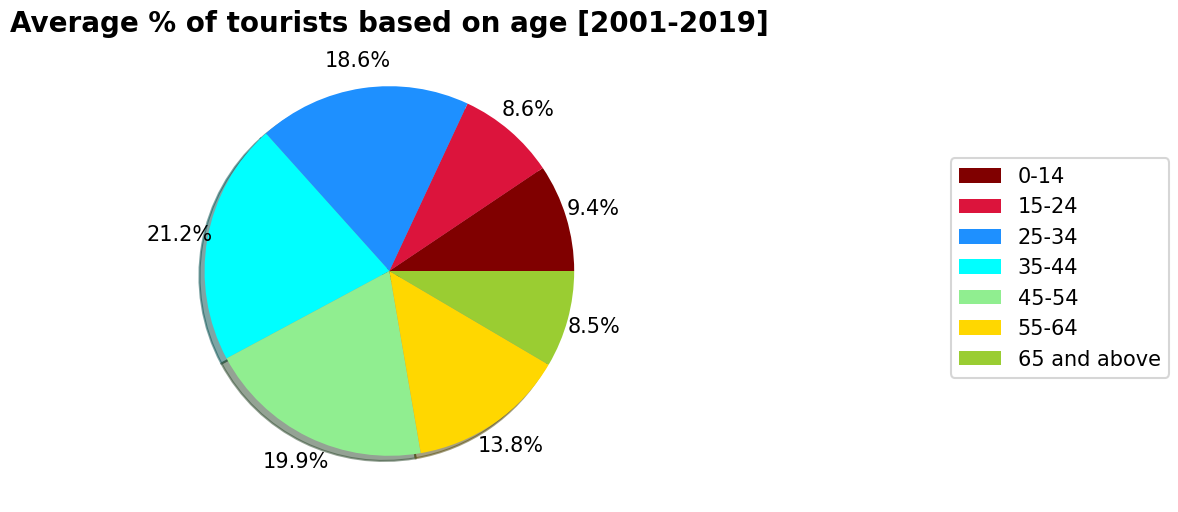

In [75]:
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen','gold','yellowgreen']
agegroup_list=['0-14','15-24','25-34','35-44','45-54','55-64','65 and above']

# plotting data on chart
plt.figure(figsize=(8,6))

pie=plt.pie(avg_agegroup_pctg, colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=0,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],agegroup_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)

plt.title("Average % of tourists based on age [2001-2019]",fontsize=20,fontweight='bold')

# displaying chart
plt.show()


# **Tourists Visit to India from top 5 countries in 2019**

In [67]:
country_and_reason=pd.read_csv('/content/drive/MyDrive/India-Tourism-Statistics-2019_region-and-reason.csv')
country_and_reason.head()

,Region,Country of Nationality,Arrivals (in numbers),Business and Professional(%),Leisure Holiday and Recreation(%),Medical(%),Indian Diaspora(%),Others(%)
0,North America,CANADA,351859,4.82,50.94,0.14,21.49,22.61
1,North America,UNITED STATES,1512032,11.24,38.56,0.08,29.48,20.64
2,North America,OTHERS,1,0.00,100.00,0.00,0.00,0.00
3,North America,Total,1863892,10.03,40.90,0.09,27.97,21.01
4,Central & South America,ARGENTINA,12844,14.69,78.60,0.08,1.25,5.38


In [68]:
countrywise=country_and_reason[country_and_reason['Country of Nationality'].isin(['Total','Grand Total','Not Classified Elsewhere','OTHERS'])==False].copy()
# Sorting w.r.t Arrivals in descending order
countrywise.sort_values(by=["Arrivals (in numbers)"],ascending=False, inplace = True)
# fetching 5 countries with top arrivals
countrywise=countrywise.iloc[0:5,:]
# dropping column 'Region'
countrywise.drop(["Region"],axis=1,inplace=True)

# Renaming columns
countrywise.rename(columns={
    'Business and Professional(%)':'Business and Professional',
    'Leisure Holiday and Recreation(%)':'Leisure Holiday and Recreation',
    'Medical(%)':'Medical',
    'Indian Diaspora(%)':'Indian Diaspora',
    'Others(%)':'Others'
},inplace=True)

# converting %ages to actual values and shifting the decimal places by 3 to the left
countrywise['Business and Professional']=countrywise['Business and Professional']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Leisure Holiday and Recreation']=countrywise['Leisure Holiday and Recreation']*countrywise['Arrivals (in numbers)']/100 * 10**-3
countrywise['Medical']=countrywise['Medical']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Indian Diaspora']=countrywise['Indian Diaspora']*countrywise['Arrivals (in numbers)']/100* 10**-3
countrywise['Others']=countrywise['Others']*countrywise['Arrivals (in numbers)']/100* 10**-3

# dropping column
countrywise.drop(["Arrivals (in numbers)"],axis=1,inplace=True)

countrywise.head()

,Country of Nationality,Business and Professional,Leisure Holiday and Recreation,Medical,Indian Diaspora,Others
55,BANGLADESH,108.522307,1994.129607,396.969958,20.364043,57.741085
1,UNITED STATES,169.952397,583.039539,1.209626,445.747034,312.083405
24,UNITED KINGDOM,107.931507,405.418348,1.000292,302.688359,183.153465
78,AUSTRALIA,29.893417,132.904518,0.367241,154.645185,49.430639
0,CANADA,16.959604,179.236975,0.492603,75.614499,79.555320


<Figure size 2000x800 with 0 Axes>

<Axes: xlabel='Country of Nationality', ylabel='value'>

Text(0, 0.5, 'Arrivals (in thousands)')

Text(0.5, 0, 'Country of Nationality')

Text(0.5, 1.0, 'Tourists to India from Top 5 countries (2019)')

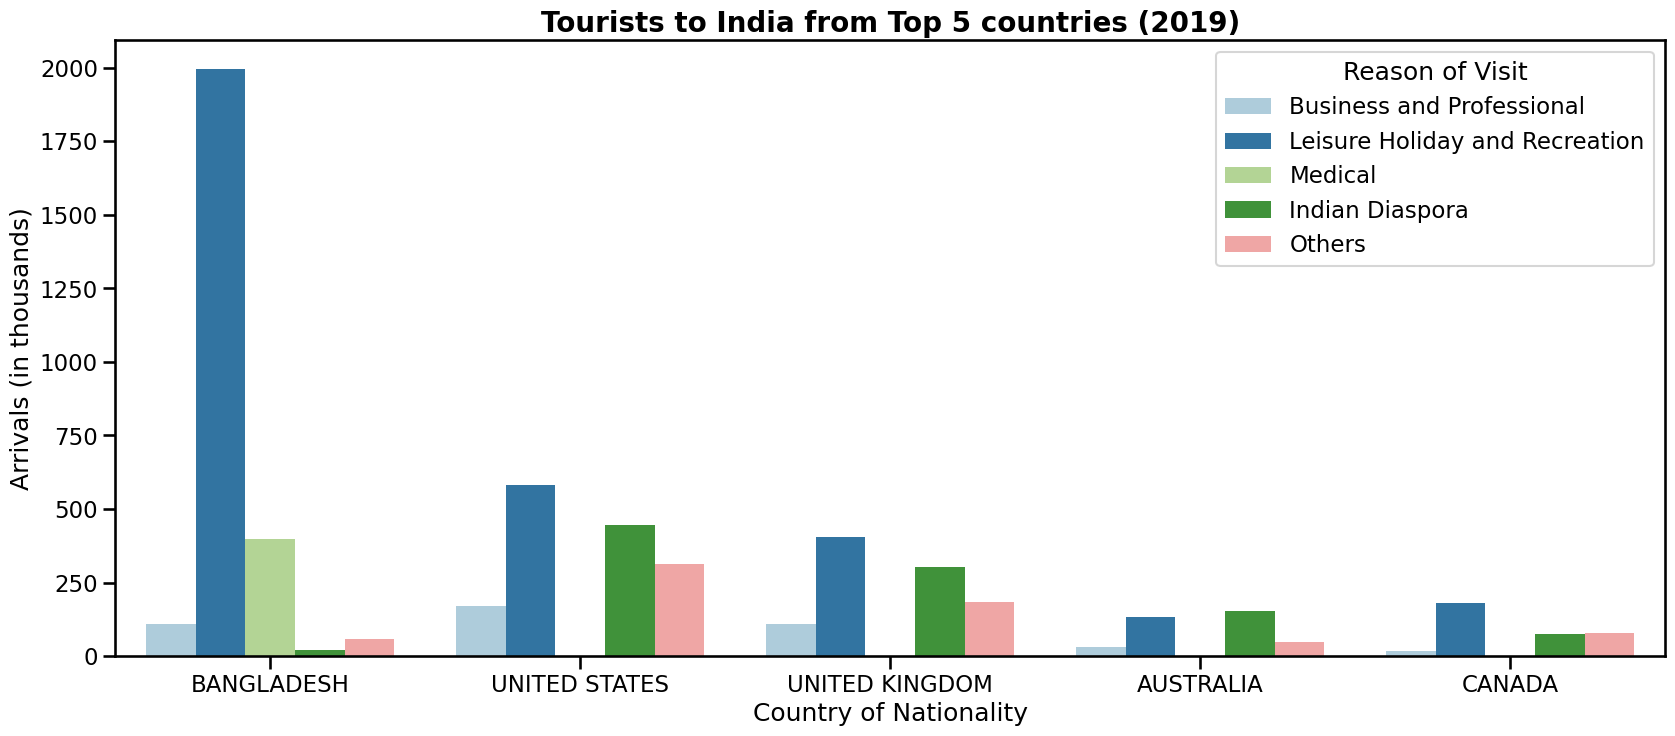

In [69]:
df=pd.melt(countrywise,['Country of Nationality']).rename(columns={"variable":"Reason of Visit"})

# plotting bar (multicolumn) graph
plt.figure(figsize=(20,8))
# country v / s reason barplot
sns.barplot(x ='Country of Nationality',y='value', hue="Reason of Visit",data = df, palette='Paired')

plt.ylabel("Arrivals (in thousands)",fontsize=18)
plt.xlabel('Country of Nationality',fontsize=18)
plt.title("Tourists to India from Top 5 countries (2019)",fontsize=20,fontweight='bold')

# Show the plot
plt.show()

# **Average Distribution of Tourists to India based on the purpose of visit in 2019**

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Average distribution of tourists based on purpose of visit - 2019')

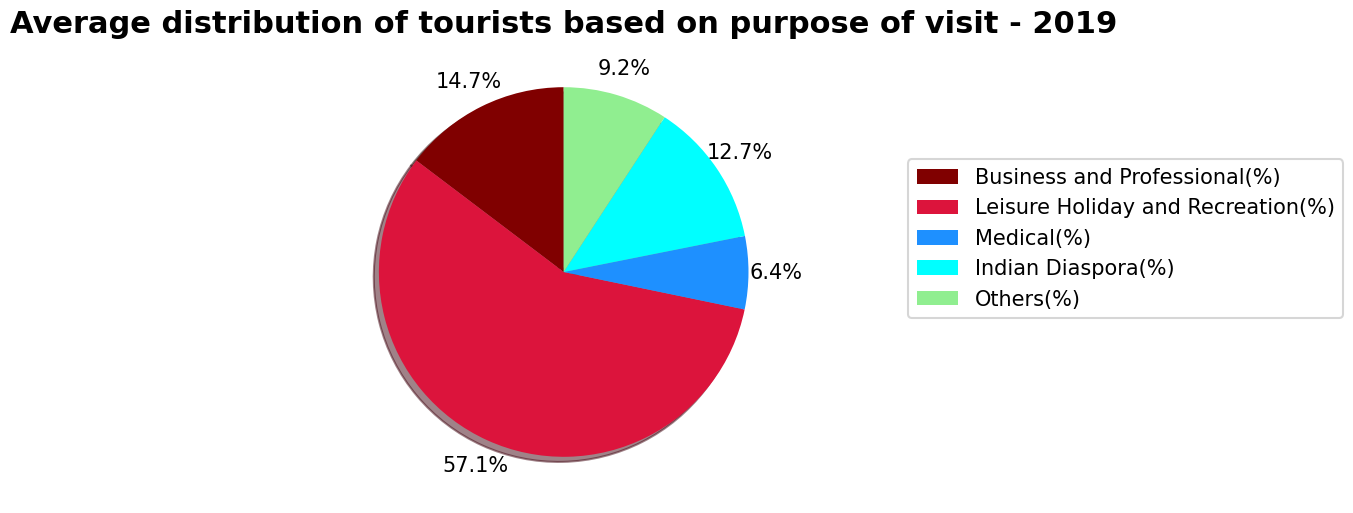

In [70]:
grand_total=country_and_reason[country_and_reason['Country of Nationality']=='Grand Total'].copy()

reason_list=['Business and Professional(%)','Leisure Holiday and Recreation(%)','Medical(%)','Indian Diaspora(%)','Others(%)']
colors = ['maroon', 'crimson', 'dodgerblue', 'aqua', 'lightgreen']

# plotting data on pie chart
plt.figure(figsize=(8,6))

pie=plt.pie(grand_total.loc[83,:].values.tolist()[3:], colors=colors,
            autopct='%1.1f%%',shadow=True, startangle=90,textprops={'fontsize': 15},pctdistance = 1.15,)
# plt.legend()
plt.legend(pie[0],reason_list, bbox_to_anchor=(1.5,0.7), loc="upper right", fontsize=15,
           bbox_transform=plt.gcf().transFigure)

plt.title("Average distribution of tourists based on purpose of visit - 2019",fontsize=22,fontweight='bold')

# displaying chart
plt.show()

#**Foreign tourists per State**

In [29]:
path = '/content/drive/MyDrive/India-Tourism-Statistics-statewise_2019-2020_domestic_foreign.csv'
ind_tourism=pd.read_csv(path)

In [30]:
ind_tourism.columns

Index(['S. No.', 'States/UTs', 'Domestic -2019', 'Foreign - 2019',
       'Domestic -2020', 'Foreign - 2020', 'Growth rate - DTV  2020/19',
       'Growth rate - FTV 2020/19'],
      dtype='object')

In [32]:
ind_tourism.dtypes

S. No.                        object
States/UTs                    object
Domestic -2019                 int64
Foreign - 2019                 int64
Domestic -2020                 int64
Foreign - 2020                 int64
Growth rate - DTV  2020/19    object
Growth rate - FTV 2020/19     object
dtype: object

In [34]:
# Parsing dataframe
foreign_statewise=ind_tourism[['States/UTs','Foreign - 2019','Foreign - 2020']].copy()
# sorting by Foreign-2019 in descending order
foreign_statewise.sort_values(by=['Foreign - 2019'], ascending=False, inplace=True)
foreign_statewise=foreign_statewise[foreign_statewise['States/UTs'].isin(['Grand Total'])==False]

# shifting the decimal places by 5 to the left
foreign_statewise['Foreign - 2019']=foreign_statewise['Foreign - 2019'] * 10**-5
foreign_statewise['Foreign - 2020']=foreign_statewise['Foreign - 2020'] * 10**-5

foreign_statewise.head()

,States/UTs,Foreign - 2019,Foreign - 2020
31,Tamil Nadu,68.66327,12.28323
21,Maharashtra,55.28704,12.62409
34,Uttar Pradesh,47.45181,8.90932
9,Delhi,29.83436,6.81230
36,West Bengal,16.56145,4.63285


<Figure size 1600x5000 with 0 Axes>

Text(69.16327000000001, -0.2, '68.66')

Text(55.787040000000005, 0.8, '55.29')

Text(47.95181, 1.8, '47.45')

Text(30.334360000000004, 2.8, '29.83')

Text(17.06145, 3.8, '16.56')

Text(16.555600000000002, 4.8, '16.06')

Text(12.397710000000002, 5.8, '11.90')

Text(11.513430000000001, 6.8, '11.01')

Text(11.431410000000001, 7.8, '10.93')

Text(9.87113, 8.8, '9.37')

Text(6.587540000000001, 9.8, '6.09')

Text(6.45607, 10.8, '5.96')

Text(4.328760000000001, 11.8, '3.83')

Text(3.77958, 12.8, '3.28')

Text(3.7332600000000005, 13.8, '3.23')

Text(3.30356, 14.8, '2.80')

Text(2.2604300000000004, 15.8, '1.76')

Text(2.0440500000000004, 16.8, '1.54')

Text(2.02273, 17.8, '1.52')

Text(1.99919, 18.8, '1.50')

Text(1.8338800000000002, 19.8, '1.33')

Text(1.65128, 20.8, '1.15')

Text(1.0792000000000002, 21.8, '0.58')

Text(0.9804600000000001, 22.8, '0.48')

Text(0.94132, 23.8, '0.44')

Text(0.88652, 24.8, '0.39')

Text(0.76878, 25.8, '0.27')

Text(0.75813, 26.8, '0.26')

Text(0.66206, 27.8, '0.16')

Text(0.63608, 28.8, '0.14')

Text(0.57825, 29.8, '0.08')

Text(0.5681700000000001, 30.8, '0.07')

Text(0.55703, 31.8, '0.06')

Text(0.55577, 32.8, '0.06')

Text(0.52249, 33.8, '0.02')

Text(0.51666, 34.8, '0.02')

Text(0.5082, 35.8, '0.01')

Text(12.783230000000001, 0.2, '12.28')

Text(13.12409, 1.2, '12.62')

Text(9.409320000000001, 2.2, '8.91')

Text(7.3123000000000005, 3.2, '6.81')

Text(5.13285, 4.2, '4.63')

Text(4.96457, 5.2, '4.46')

Text(3.90755, 6.2, '3.41')

Text(4.09114, 7.2, '3.59')

Text(3.5808000000000004, 8.2, '3.08')

Text(3.5275100000000004, 9.2, '3.03')

Text(2.15325, 10.2, '1.65')

Text(2.60047, 11.2, '2.10')

Text(0.92665, 12.2, '0.43')

Text(1.4981900000000001, 13.2, '1.00')

Text(0.96694, 14.2, '0.47')

Text(1.17591, 15.2, '0.68')

Text(0.5049, 16.2, '0.00')

Text(0.81877, 17.2, '0.32')

Text(0.91339, 18.2, '0.41')

Text(1.4208, 19.2, '0.92')

Text(0.69935, 20.2, '0.20')

Text(0.60206, 21.2, '0.10')

Text(0.55317, 22.2, '0.05')

Text(0.67474, 23.2, '0.17')

Text(0.62218, 24.2, '0.12')

Text(0.51126, 25.2, '0.01')

Text(0.57285, 26.2, '0.07')

Text(0.52311, 27.2, '0.02')

Text(0.55412, 28.2, '0.05')

Text(0.53139, 29.2, '0.03')

Text(0.50961, 30.2, '0.01')

Text(0.52322, 31.2, '0.02')

Text(0.51382, 32.2, '0.01')

Text(0.50518, 33.2, '0.01')

Text(0.50265, 34.2, '0.00')

Text(0.50222, 35.2, '0.00')

Text(0.50413, 36.2, '0.00')

Text(0.5, 1.0, 'Foreign tourists per State/UTs [2019, 2020]')

Text(0.5, 0, 'Arrivals (in lakhs)')

Text(0, 0.5, 'States/UTs')

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Tamil Nadu '),
  Text(0, 1, 'Maharashtra'),
  Text(0, 2, 'Uttar Pradesh'),
  Text(0, 3, 'Delhi'),
  Text(0, 4, 'West Bengal '),
  Text(0, 5, 'Rajasthan  '),
  Text(0, 6, 'Kerala '),
  Text(0, 7, 'Punjab '),
  Text(0, 8, 'Bihar  '),
  Text(0, 9, 'Goa '),
  Text(0, 10, 'Karnataka '),
  Text(0, 11, 'Gujarat '),
  Text(0, 12, 'Himachal Pradesh  '),
  Text(0, 13, 'Madhya Pradesh'),
  Text(0, 14, 'Telengana'),
  Text(0, 15, 'Andhra Pradesh  '),
  Text(0, 16, 'Jharkhand'),
  Text(0, 17, 'Tripura '),
  Text(0, 18, 'Uttarakhand '),
  Text(0, 19, 'Puducherry'),
  Text(0, 20, 'Sikkim '),
  Text(0, 21, 'Odisha '),
  Text(0, 22, 'J&K '),
  Text(0, 23, 'Haryana '),
  Text(0, 24, 'Chandigarh  '),
  Text(0, 25, 'Ladakh'),
  Text(0, 26, 'Assam '),
  Text(0, 27, 'Meghalaya '),
  Text(0, 28, 'A&N Island '),
  Text(0, 29

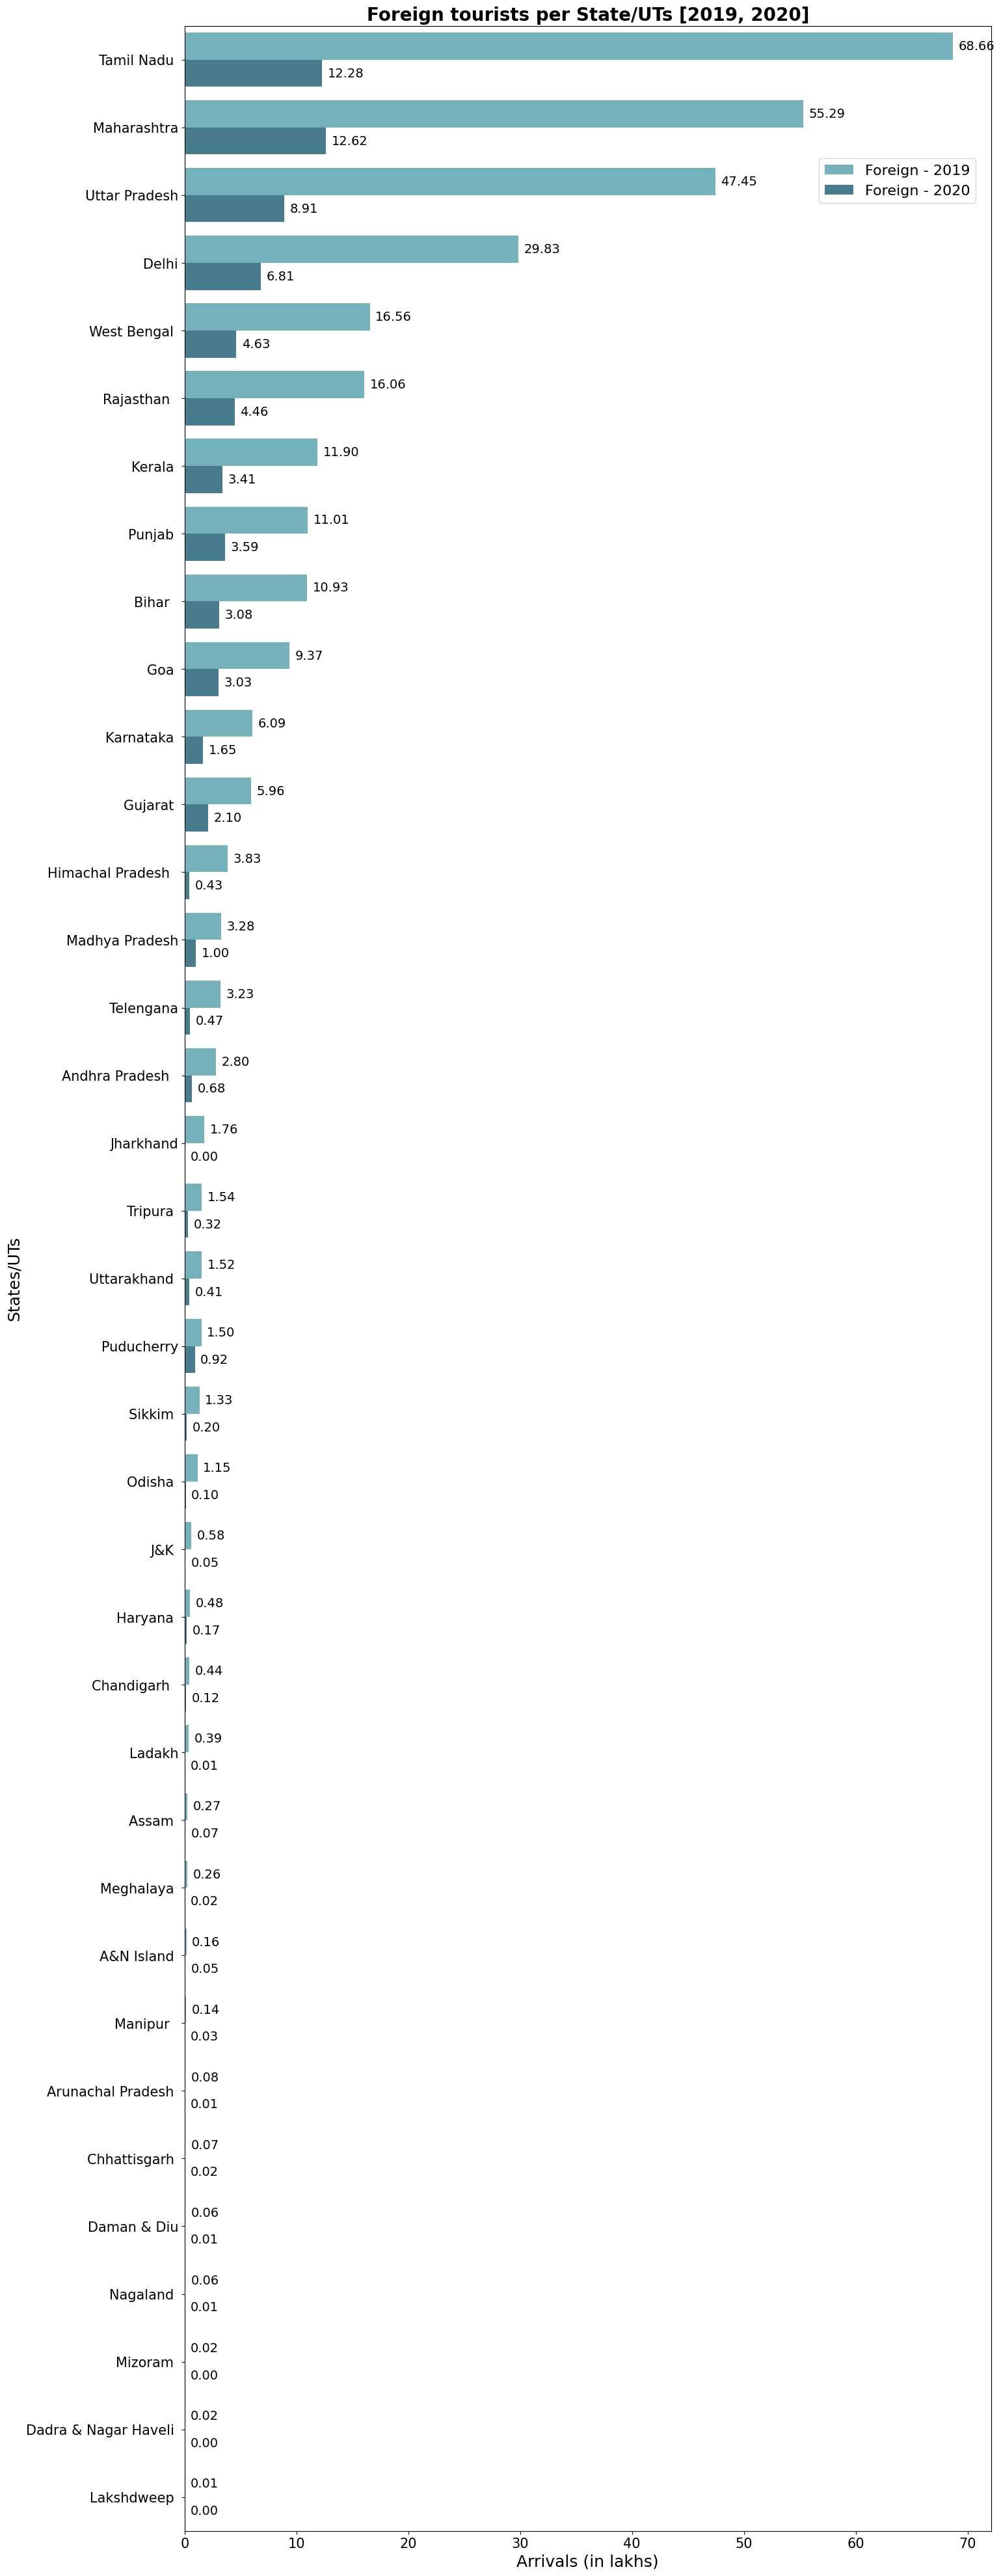

In [38]:
df=pd.melt(foreign_statewise,['States/UTs']).rename(columns={"variable":"Year"})

# plotting data on horizontal bar graph
plt.figure(figsize=(16,50))
ax = sns.barplot(x="value", y="States/UTs", data=df, hue='Year', palette='GnBu_d')

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',  # vertical alignment
            fontsize=14)

plt.title("Foreign tourists per State/UTs [2019, 2020]", fontsize=20, fontweight='bold')
plt.xlabel("Arrivals (in lakhs)", fontsize=18)
plt.ylabel("States/UTs", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(bbox_to_anchor=(0.99,0.95), prop={'size': 16})

# display the chart
plt.show()